# LSTM Model 

This model uses a pregenerated feature vector with LSTM neural net.

## Load data

In [1]:
import pandas as pd 
import requests
import io
url="https://gitlab.com/ivan.jesus.torres/pmrl-tesla/-/raw/main/Datasets/Generated%20datasets/df_ann.csv"
df_ann = pd.read_csv(url)
print(df_ann.head(5))

    feature_0   feature_1   feature_2  ...  feature_598  feature_599      target
0  119.842941  121.000000  116.158646  ...          0.0         47.0  146.540009
1  146.417999  148.376007  138.731995  ...          0.0         46.0  146.540009
2  147.850006  150.501999  145.328003  ...          0.0         60.0  146.024002
3  145.347992  145.543991  141.685059  ...          0.0         62.0  141.483978
4  152.406006  154.428009  151.183990  ...          0.0         60.0  145.519989

[5 rows x 601 columns]


## Checking variables

In [ ]:
time_vector = list(df_ann.index.values)

In [ ]:
df_ann.shape[1]

601

In [ ]:
df_ann.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,...,feature_561,feature_562,feature_563,feature_564,feature_565,feature_566,feature_567,feature_568,feature_569,feature_570,feature_571,feature_572,feature_573,feature_574,feature_575,feature_576,feature_577,feature_578,feature_579,feature_580,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,feature_591,feature_592,feature_593,feature_594,feature_595,feature_596,feature_597,feature_598,feature_599,target
0,119.842941,121.0,116.158646,5253733.0,61.0,122.199997,122.323997,119.207993,2763665.0,67.0,124.880386,127.0,121.407997,4404805.0,72.0,125.144272,126.157997,124.234718,2001751.0,77.0,127.587997,128.259995,125.042007,2403777.0,75.0,128.042007,129.195999,127.126465,2332085.0,81.0,130.197983,130.399994,127.909996,2376099.0,86.0,139.793991,139.793991,139.793991,0.0,95.0,...,146.540009,146.540009,0.0,52.0,146.540009,146.540009,146.540009,0.0,49.0,146.540009,146.540009,146.540009,0.0,48.0,146.540009,146.540009,146.540009,0.0,45.0,146.540009,146.540009,146.540009,0.0,46.0,146.540009,146.540009,146.540009,0.0,46.0,146.540009,146.540009,146.540009,0.0,46.0,146.540009,146.540009,146.540009,0.0,47.0,146.540009


In [ ]:
# Get values of the dataframe
final_dataset = df_ann.values
print(final_dataset)

[[119.84294128 121.         116.15864563 ...   0.          47.
  146.54000854]
 [146.41799927 148.37600708 138.73199463 ...   0.          46.
  146.54000854]
 [147.8500061  150.5019989  145.32800293 ...   0.          60.
  146.02400208]
 ...
 [705.13000488 705.13000488 705.13000488 ...   0.          62.
  676.        ]
 [705.13000488 705.13000488 705.13000488 ...   0.          63.
  677.77001953]
 [705.13000488 705.13000488 705.13000488 ...   0.          58.
  677.02001953]]


## Scaling data

This case the MinMaxScaler will be used.

In [ ]:
# Scaling data (normalize features)
from pandas import Series, DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)
print(scaled_data)
print(scaled_data.shape)

[[0.         0.         0.         ... 0.         0.45333333 0.00853   ]
 [0.03444431 0.03553572 0.02911858 ... 0.         0.44       0.00853   ]
 [0.03630035 0.03829539 0.03762713 ... 0.         0.62666667 0.00783576]
 ...
 [0.75859877 0.7582362  0.75974604 ... 0.         0.65333333 0.72087827]
 [0.75859877 0.7582362  0.75974604 ... 0.         0.66666667 0.7232597 ]
 [0.75859877 0.7582362  0.75974604 ... 0.         0.6        0.72225063]]
(357, 601)


## Get train and test data

In [ ]:
# Getting training and test sets
X = scaled_data[:,0:-1]
y = scaled_data[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False) 

## Reshape data

The desired shape would be [samples, 1, features]

In [ ]:
# Reshape input to be 3D [samples, 1, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(267, 1, 600) (267,) (90, 1, 600) (90,)


## Build and Train model

In this approach a simple network will be trained.

Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 1292/50000
9/9 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.1113

Epoch 01292: val_loss improved from 0.11168 to 0.11133, saving model to model_checkpoint.h5
Epoch 1293/50000
9/9 [==============================] - 0s 8ms/step - loss: 0.0254 - val_loss: 0.1110

Epoch 01293: val_loss improved from 0.11133 to 0.11099, saving model to model_checkpoint.h5
Epoch 1294/50000
9/9 [==============================] - 0s 7ms/step - loss: 0.0241 - val_loss: 0.1107

Epoch 01294: val_loss improved from 0.11099 to 0.11066, saving model to model_checkpoint.h5
Epoch 1295/50000
9/9 [==============================] - 0s 7ms/step - loss: 0.0240 - val_loss: 0.1103

Epoch 01295: val_loss improved from 0.11066 to 0.11033, saving model to model_checkpoint.h5
Epoch 1296/50000
9/9 [==============================] - 0s 7ms/step - loss: 0.0238 - val_loss: 0.1100

Epoch 01296: val_loss improved from 0.11033 to 0.10998, 

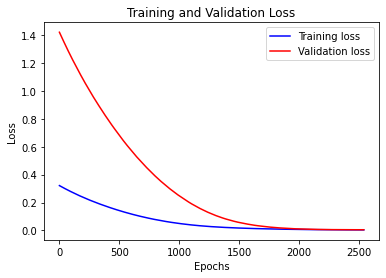

In [ ]:
import matplotlib.pyplot as plt
import keras
import keras.models as models
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
import pandas as pd
import numpy as np
import keras.layers.core as core
import keras.layers.convolutional as conv
import keras.models as models
import keras.utils.np_utils as kutils
# Defining and fitting LSTM model
    # We will use the Mean Squared Error (MSE) loss function 
    # and the efficient Adam version of stochastic gradient descent.
learning_rate = 0.0000001
batch_size = 1
epochs = 50000
inputs = keras.layers.Input(shape=(1, df_ann.shape[1]-1))
lstm_out = keras.layers.LSTM(50)(inputs)#32
outputs = keras.layers.Dense(1)(lstm_out)

#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=learning_rate,
#    decay_steps=100,
#    decay_rate=0.9)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()



path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.000000002, patience=25)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_test,y_test),
    callbacks=[es_callback, modelckpt_callback],
)
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

## Evaluate the model

In [ ]:
# Evaluating the model
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# make a prediction
yhat = model.predict(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[2]))
#print("x_test")
#print(x_test)
# invert scaling for forecast
inv_yhat = concatenate((yhat, x_test[:, 0:]), axis=1)
print(inv_yhat)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, x_test[:, 0:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#print(inv_yhat)
#print(inv_yhat.shape)
#print(inv_y)
#print(inv_y.shape)
# https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
# Calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# Calculate MAE
mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)
# r2
from sklearn.metrics import r2_score
test_r2 = r2_score(inv_y, inv_yhat)
print('Test r2: %.3f' % test_r2)

y_pred_array=[]
y_orig_array=[]
y_pred_array.append(inv_yhat) 
y_orig_array.append(inv_y)

x_test
[[0.78261572 0.78228922 0.78364885 ... 0.93854997 0.         0.30666667]
 [0.82971653 0.82946078 0.83052582 ... 0.93854997 0.         0.46666667]
 [0.85130976 0.85108644 0.85201642 ... 0.91961979 0.         0.42666667]
 ...
 [0.75859877 0.7582362  0.75974604 ... 0.7279214  0.         0.65333333]
 [0.75859877 0.7582362  0.75974604 ... 0.71327777 0.         0.66666667]
 [0.75859877 0.7582362  0.75974604 ... 0.71563409 0.         0.6       ]]
[[0.95628911 0.78261572 0.78228922 ... 0.93854997 0.         0.30666667]
 [0.96578062 0.82971653 0.82946078 ... 0.93854997 0.         0.46666667]
 [0.81479669 0.85130976 0.85108644 ... 0.91961979 0.         0.42666667]
 ...
 [0.78502041 0.75859877 0.7582362  ... 0.7279214  0.         0.65333333]
 [0.78837925 0.75859877 0.7582362  ... 0.71327777 0.         0.66666667]
 [0.7661671  0.75859877 0.7582362  ... 0.71563409 0.         0.6       ]]
Test RMSE: 53.641
Test MAE: 43.836
Test r2: 0.666


Checking variables

In [ ]:
sz = scaled_data.shape[0]
sz

357

In [ ]:
sz_train = round(0.75*sz)
sz_test = round(0.25*sz)
time = time_vector[0:sz_train]
y_original = df_ann.iloc[:,-1]
y_original = y_original[0:sz_train]
# It is the same as y_stocke
# y_stocke = df_stocke["Close"]
# y_stocke = y_original[0:sz_train]

y_orig_test = df_ann.iloc[:,-1]
y_orig_test = y_orig_test[sz_train:(sz_train+sz_test)]
time_test = time_vector[sz_train:(sz_train+sz_test)]

## Prediction at the final time

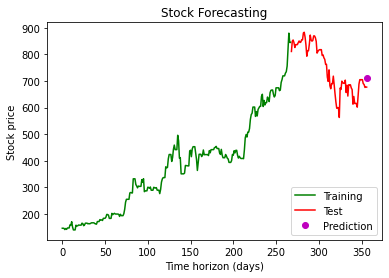

In [ ]:
fig = plt.figure()
plt.plot(time,y_original,color='green')
plt.plot(time_test,y_orig_test,color='red')
plt.plot(time_test[-1],inv_yhat[-1],'mo')

plt.title("Stock Forecasting")
plt.ylabel("Stock price")
plt.xlabel("Time horizon (days)")
plt.legend(["Training","Test","Prediction"], loc ="lower right")
plt.show()

Checking variables

In [ ]:
inv_y[-1]

677.0860728397089

In [ ]:
len(time_test)

89

In [ ]:
inv_yhat[-1]

710.9692591186422

## Plot
Real data is in green, the * are compared with the blue o. They are the real data and the predictions for that time of the testing set.

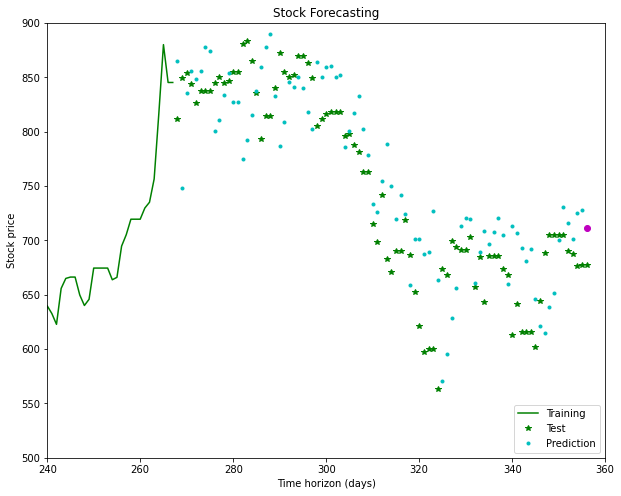

In [ ]:
#Image_FORECASTING_LSTM_0_0
plt.figure(figsize=(10,8))
plt.plot(time,y_original,color='green')
plt.plot(time_test,y_orig_test,'g*')
plt.plot(time_test,inv_yhat[1:],'c.')
plt.plot(time_test[-1],inv_yhat[-1],'mo')

plt.title("Stock Forecasting")
plt.ylabel("Stock price")
plt.xlabel("Time horizon (days)")
plt.legend(["Training","Test","Prediction"], loc ="lower right")
plt.xlim([240,360])
plt.ylim([500,900])
plt.show()